# Practical 9: Correlation



In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt    #Plotting library used by seaborn, see http://matplotlib.org/users/pyplot_tutorial.html
%matplotlib inline  

import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LondonLSOAData.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

In [ ]:
#covariance
covmat = df.cov()
print "Covariance matrix:", '\n', covmat, '\n'

Pearson correlation coefficient matrix: 
                USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
USUALRES          1.0000    0.9521     0.2249  0.1110  0.6408     0.1451   
HHOLDRES          0.9521    1.0000    -0.0838  0.1137  0.6469     0.1881   
COMESTRES         0.2249   -0.0838     1.0000 -0.0005  0.0269    -0.1266   
POPDEN            0.1110    0.1137    -0.0005  1.0000  0.2041    -0.1225   
HHOLDS            0.6408    0.6469     0.0269  0.2041  1.0000    -0.6065   
AVHHOLDSZ         0.1451    0.1881    -0.1266 -0.1225 -0.6065     1.0000   
GreenspaceArea   -0.0013   -0.0198     0.0588 -0.1860  0.0008    -0.0239   
RoadsArea         0.0995    0.0720     0.0945 -0.3562  0.1086    -0.0696   
Owned             0.0271    0.0512    -0.0747 -0.5443  0.0256     0.0158   
SharedOwnshp      0.3097    0.3094     0.0234  0.1167  0.3429    -0.1291   
SocialRented      0.2394    0.2372     0.0244  0.4231  0.3462    -0.2248   
PrivateRented     0.3810    0.3641     0.0816  

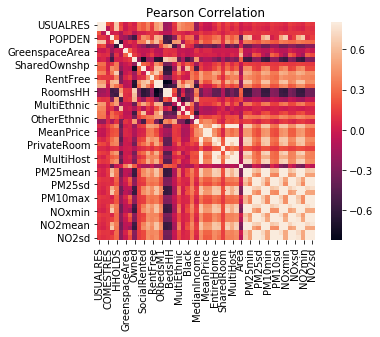

In [25]:
#Pearson correlation
corrmat = df.corr()
print "Pearson correlation coefficient matrix:", '\n', corrmat, '\n'

sb.heatmap(corrmat, vmax=.8, square=True)
plt.title("Pearson Correlation")

Spearman rank correlation coefficient matrix: 
                USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
USUALRES          1.0000    0.9708     0.1141  0.1761  0.5888     0.1227   
HHOLDRES          0.9708    1.0000    -0.0131  0.1760  0.5861     0.1593   
COMESTRES         0.1141   -0.0131     1.0000 -0.0088  0.1261    -0.1779   
POPDEN            0.1761    0.1760    -0.0088  1.0000  0.2277    -0.1519   
HHOLDS            0.5888    0.5861     0.1261  0.2277  1.0000    -0.6458   
AVHHOLDSZ         0.1227    0.1593    -0.1779 -0.1519 -0.6458     1.0000   
GreenspaceArea    0.0162    0.0064     0.0250 -0.2481  0.0186    -0.0098   
RoadsArea         0.1410    0.1184     0.1296 -0.2962  0.1589    -0.0988   
Owned            -0.0015    0.0221    -0.0382 -0.5569  0.0054     0.0481   
SharedOwnshp      0.3184    0.3148     0.0305  0.2121  0.3494    -0.1503   
SocialRented      0.2264    0.2202     0.0193  0.4260  0.3692    -0.2560   
PrivateRented     0.4063    0.3791     0.

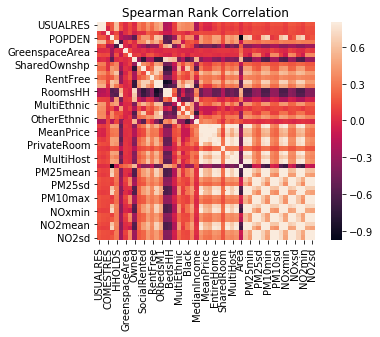

In [27]:
#Spearman correlation
corspmat = df.corr(method = "spearman")
print "Spearman rank correlation coefficient matrix:", '\n', corspmat, '\n'

sb.heatmap(corspmat, vmax=.8, square=True)
plt.title("Spearman Rank Correlation")

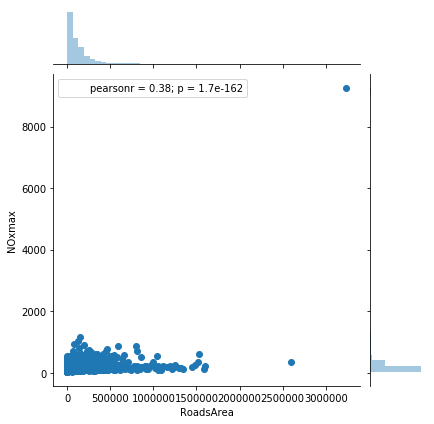

In [16]:
#jointplots
sb.jointplot(x="RoadsArea", y="NOxmax", data=df) 

The outlier LSOAs are: 


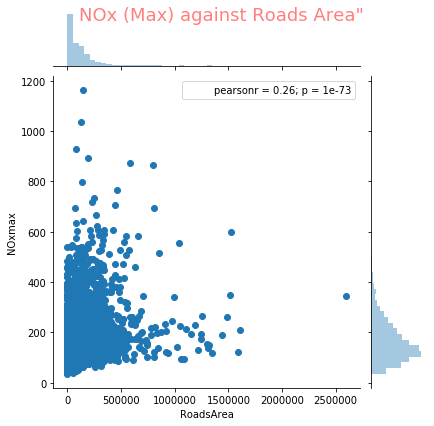

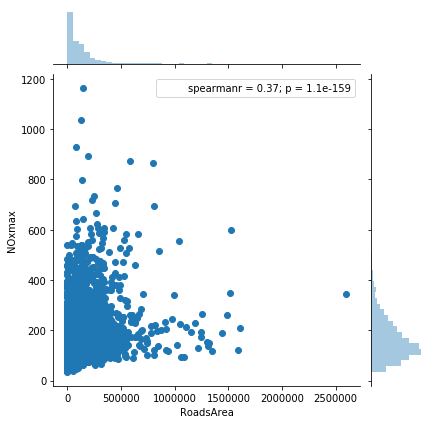

In [24]:
print("The outlier LSOAs are: " + ",".join(df[df.NOxmax > 4000]['LSOA11NM'].values))
df = df[df.NOxmax < 4000]

g = sb.jointplot(x=df.RoadsArea, y=df.NOxmax, size=6)
g.fig.suptitle('NOx (Max) against Roads Area"', fontsize=18, color="r",alpha=0.5)

from scipy.stats import spearmanr
sb.jointplot(x="RoadsArea", y="NOxmax", data=df, stat_func=spearmanr)

count   4,835.0000
mean        8.6907
std         4.9109
min         0.0000
25%         7.4116
50%        11.2448
75%        11.9210
max        14.9898
Name: RoadsArea, dtype: float64


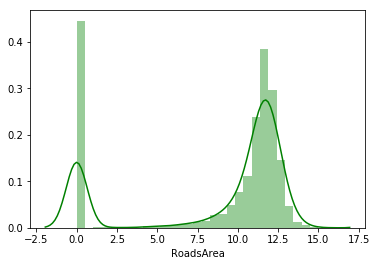

In [12]:
pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))

series = pd.Series(np.log(my_df.RoadsArea + 1))
print(series.describe())
sb.distplot(series, color='green')

C:\ProgramData\Anaconda2\envs\gsa2017\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


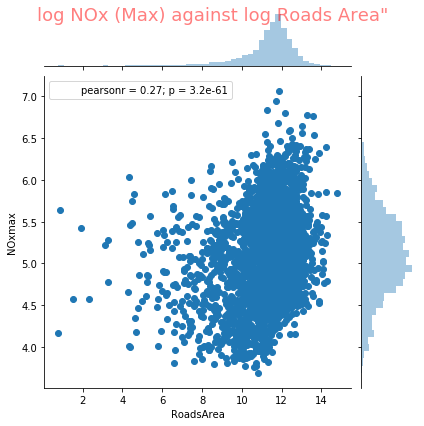

In [59]:
hrds = df.loc[df.RoadsArea > 0] # hrds == has (major) roads

hrds = df.loc[np.log(df.RoadsArea) > 0] # hrds == has (major) roads

g = sb.jointplot(x=np.log(hrds.RoadsArea), y=np.log(hrds.NOxmax), size=6)
g.fig.suptitle('log NOx (Max) against log Roads Area"', fontsize=18,color="r",alpha=0.5)


In [54]:
import statsmodels.api as sm 

roads = np.log(hrds['RoadsArea'])
roads = sm.add_constant(roads)
logNOxmax_logRoads_mod = sm.OLS(np.log(hrds.NOxmax), roads).fit()
print "Summary of NOxmax_logRoads_mod", '\n', logNOxmax_logRoads_mod.summary()
#NOxmax_logRoads_mod.summary()



Summary of NOxmax_logRoads_mod 
                            OLS Regression Results                            
Dep. Variable:                 NOxmax   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sun, 12 Nov 2017   Prob (F-statistic):           1.14e-59
Time:                        17:14:03   Log-Likelihood:                -2588.5
No. Observations:                3723   AIC:                             5181.
Df Residuals:                    3721   BIC:                             5193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.085

0.0676


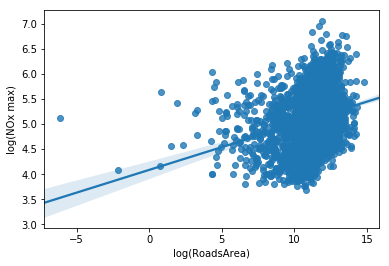

In [53]:
h = sb.regplot(x=np.log(hrds.RoadsArea), y=np.log(hrds.NOxmax))  
plt.xlabel('log(RoadsArea)')
plt.ylabel('log(NOx max)')    


To save the pairplot as an image file on your hard disk (for example to include later in a report in Word) we need to add some additional code (using the [matplotlib](http://matplotlib.org/users/pyplot_tutorial.html) package):

In [ ]:
fig = plt.figure('Pairplot')                         #create a plot object
fig = sb.pairplot(df_num.dropna(axis = 0))           #add the seaborn pairplot for our dataset
plt.savefig('Pairplot.png', bbox_inches='tight')     #save the plot with the given filename
plt.close()                                          #stop writing to the plot

In [110]:
#with help from https://stackoverflow.com/questions/24088439/how-to-apply-ols-from-statsmodels-to-groupby

linear_regression_grouped = hrds.groupby('LAD11NM')

r2 = []
m = []
c = []
n = []
mp = []
cp = []
sp = []
r = []

groups = linear_regression_grouped.groups.keys()

for group in groups:
    print  group 
    
    #create data objects
    rdf= linear_regression_grouped.get_group(group)
    y = np.log(rdf['NOxmax'])
    X = np.log(rdf['RoadsArea'])
        
    #plot file
    #fig = plt.figure(group)                         #create a plot object
    #fig = sb.regplot(x=np.log(rdf.RoadsArea), y=np.log(rdf.NOxmax))            #add the seaborn pairplot for our dataset
    #plt.savefig('{0}_Regplot.png'.format(group), bbox_inches='tight')     #save the plot with the given filename
    #plt.close()     
    
    from scipy.stats import pearsonr
    pr = pearsonr(X,y)
    
    from scipy.stats import spearmanr
    spn = spearmanr(X,y)
    
    #fit model using OLS
    X= sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    
    
    #get summary of results  (or do this as a dict??)
    r2.append(results.rsquared)
    r.append(pr[0])
    sp.append(spn[0])
    m.append(results.params[1])
    c.append(results.params[0])
    n.append(results.nobs)
    mp.append(results.pvalues[1])
    cp.append(results.pvalues[0])
        

r2Summary = pd.Series(r2, index=groups)
rSummary = pd.Series(r, index=groups)
spSummary = pd.Series(sp, index=groups)
mSummary = pd.Series(m, index=groups)
cSummary = pd.Series(c, index=groups)
nSummary = pd.Series(n, index=groups)
mpSummary = pd.Series(mp, index=groups)
cpSummary = pd.Series(cp, index=groups)

mySummary = pd.concat([rSummary, spSummary, r2Summary, mSummary, mpSummary, cSummary, cpSummary, nSummary], axis=1)
mySummary = mySummary.rename(columns={0: 'r', 1: 'sp', 2: 'r2', 3: 'm', 4: 'm_p', 5: 'c', 6: 'c_p', 7: 'n'})

print mySummary

Islington
Southwark
Kensington and Chelsea
Greenwich
Hounslow
Lewisham
Lambeth
Barnet
Hammersmith and Fulham
Westminster
Barking and Dagenham
Enfield
City of London
Croydon
Merton
Haringey
Harrow
Hackney
Kingston upon Thames
Havering
Waltham Forest
Hillingdon
Bexley
Ealing
Sutton
Bromley
Redbridge
Newham
Wandsworth
Tower Hamlets
Camden
Richmond upon Thames
Brent
                             r     sp     r2       m    m_p      c    c_p  \
Islington               0.3839 0.3902 0.1474  0.1440 0.0000 3.6752 0.0000   
Southwark               0.1666 0.2215 0.0277  0.0509 0.0563 4.7038 0.0000   
Kensington and Chelsea  0.5219 0.4702 0.2724  0.1789 0.0000 3.5644 0.0000   
Greenwich               0.4060 0.3981 0.1649  0.1355 0.0000 3.5582 0.0000   
Hounslow                0.3961 0.3446 0.1569  0.1404 0.0000 3.5240 0.0000   
Lewisham               -0.0268 0.1570 0.0007 -0.0066 0.7841 5.1824 0.0000   
Lambeth                 0.1673 0.1582 0.0280  0.0488 0.0715 4.7142 0.0000   
Barnet             

In [ ]:
#code to map these borough-level correlations


### Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of the MIT and CC-BY licenses...

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: datetime (?), matplotlib (1.5.1), os (?), pandas (0.20.3), scipy (0.19.0), seaborn (0.7.0)
